## Connect to Drive


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
data_path = '/content/drive/MyDrive/all.csv'

## Install Bengali Language Toolkit

In [1]:
!pip install -U bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 8.4 MB/s 
     |████████████████████████████████| 23.9 MB 2.0 MB/s 
     |████████████████████████████████| 965 kB 59.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
# Required Libraries

from nltk import ngrams
from collections import Counter
import numpy as np
import re
from collections import OrderedDict
import pandas as pd
from google.colab import files
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Get Bangla Font
1. Download font from the specified link
2. Unzip the downloaded file
3. Move Desired font style to `/usr/share/fonts/truetype/`
4. Specify fontproperties

In [3]:
!wget "https://fonts.google.com/download?family=Noto%20Sans%20Bengali"

--2022-10-12 17:03:13--  https://fonts.google.com/download?family=Noto%20Sans%20Bengali
Resolving fonts.google.com (fonts.google.com)... 74.125.137.139, 74.125.137.101, 74.125.137.138, ...
Connecting to fonts.google.com (fonts.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘download?family=Noto Sans Bengali’

download?family=Not     [  <=>               ]   3.19M  11.7MB/s    in 0.3s    

2022-10-12 17:03:14 (11.7 MB/s) - ‘download?family=Noto Sans Bengali’ saved [3344095]



In [4]:
!unzip "/content/download?family=Noto Sans Bengali"

Archive:  /content/download?family=Noto Sans Bengali
  inflating: OFL.txt                 
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-Thin.ttf  
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-ExtraLight.ttf  
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-Light.ttf  
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-Regular.ttf  
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-Medium.ttf  
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-SemiBold.ttf  
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-Bold.ttf  
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-ExtraBold.ttf  
  inflating: static/NotoSansBengali_ExtraCondensed/NotoSansBengali_ExtraCondensed-Black.ttf  
  inflating: static/NotoSansBengali_Condensed/Noto

In [5]:
!mv /content/static/NotoSansBengali/NotoSansBengali-Medium.ttf /usr/share/fonts/truetype/

In [6]:
path = '/usr/share/fonts/truetype/NotoSansBengali-Medium.ttf'
fontprop = fm.FontProperties(fname=path, size= 15)

## Read csv and tokenize bangla words

In [52]:
df = pd.read_csv(data_path)
df

,Title,Details,Category,Writer,Date
0,আ স্টার ইজ বর্ন,প্রতিরাতের মতন আজও আমি ছাদে উঠে এলাম। তবে আজকে...,"গল্প,জাদু বাস্তবতা",অর্নব ফায়েক,৩০ আগষ্ট ২০২২
1,না বলা কথা,ঐ চোখের পানে চেয়ে দেখেছিলেম পৃথিবীকে সাথে রঙিন...,NaN,মোঃ ফরহাদ হোসেন,১৮ আগষ্ট ২০২২
2,Ovid এর art of love (ভালবাসার ছলাকলা),"পুবলিয়াস ওভিডাস নাসো(ওভিড) জন্মস্থানঃসুমিলো,রো...","ধারাবাহিক,গল্প-অনুবাদ",ইললু,৭ আগষ্ট ২০২২
3,Ovid এর Art of love,"পুবলিয়াস ওভিডাস নাসো(ওভিড) জন্মস্থানঃসুমিলো,রো...","অনুবাদ,ধারাবাহিক",ইললু,১৪ জুন ২০২২
4,Ovid এর Art of Love (ভালবাসার ছলাকলা),"পুবলিয়াস ওভিডাস নাসো(ওভিড) জন্মস্থানঃসুমিলো,রো...",অনুবাদ,ইললু,২৬ মে ২০২২
...,...,...,...,...,...
25542,"একটি অখাদ্য পোষ্ট - ""২০১২"" মুভি। X( X((",মেজাজটা খুবই খারাপ হলো কাল রাতে।অনেক সুনাম-দুর...,NaN,নির্ঝর,৮ ফেব্রুয়ারী ২০১০
25543,এইখানে আগমণ করিলাম। ;),মেজাজ চরম খারাপ হয়ে আছে। ২০১২ মুভিটা দেখে.......,NaN,নির্ঝর,৭ ফেব্রুয়ারী ২০১০
25544,মামুলী রোমান্টিক কবিতা,জানিসনারে বন্ধু ও তোর অপেক্ষারই প্রহর আমার লাগ...,NaN,শাওন৩৫০৪,৬ ফেব্রুয়ারী ২০১০
25545,অতলস্পর্শ অনুভবে তুমি,"আকাশ স্পর্শ করতে শিখিয়েছিলে তুমি আমায় বলেছিলে,...",NaN,জলরঙ,৬ ফেব্রুয়ারী ২০১০


In [ ]:
reader_1 = pd.read_csv(data_path)[:6387]
text = reader_1.to_string()
print('extracted data as string')

tokens = bnltk.word_tokenize(text)
print('tokenization done')

words_1 = []  
for token in tokens:
    if re.findall("^[\u0985-\u09E5]+$", token):
        words_1.append(token)
print("Bangla Word Extraction Done")

with open("words_1.txt", "w") as f:
    for w in words_1:
        f.write(str(w) +"\n")
print('Saved words in a file')

files.download('/content/words_1.txt')
print('File downloaded')
print("Length is: ", len(words_1))

extracted data as string
tokenization done
Bangla Word Extraction Done
Saved words in a file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File downloaded
Length is:  2735603


In [ ]:
reader_2 = pd.read_csv(data_path)[6387:12774]
text = reader_2.to_string()
print('extracted data as string')

tokens = bnltk.word_tokenize(text)
print('tokenization done')

words_2 = []  
for token in tokens:
    if re.findall("^[\u0985-\u09E5]+$", token):
        words_2.append(token)
print("Bangla Word Extraction Done")

with open("words_2.txt", "w") as f:
    for w in words_2:
        f.write(str(w) +"\n")
print('Saved words in a file')

files.download('/content/words_2.txt')
print('File downloaded')
print("Length is: ", len(words_2))

extracted data as string
tokenization done
Bangla Word Extraction Done
Saved words in a file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File downloaded
Length is:  3006711


In [ ]:
reader_3 = pd.read_csv(data_path)[12774:19161]
text = reader_3.to_string()
print('extracted data as string')

tokens = bnltk.word_tokenize(text)
print('tokenization done')
words_3 = []  

for token in tokens:
    if re.findall("^[\u0985-\u09E5]+$", token):
        words_3.append(token)
print("Bangla Word Extraction Done")

with open("words_3.txt", "w") as f:
    for w in words_3:
        f.write(str(w) +"\n")
print('Saved words in a file')

files.download('/content/words_3.txt')
print('File downloaded')
print("Length is: ", len(words_3))

extracted data as string
tokenization done
Bangla Word Extraction Done
Saved words in a file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File downloaded
Length is:  2875728


In [ ]:
reader_4 = pd.read_csv(data_path)[19161:]
text = reader_4.to_string()
print('extracted data as string')

tokens = bnltk.word_tokenize(text)
print('tokenization done')
words_4 = []  

for token in tokens:
    if re.findall("^[\u0985-\u09E5]+$", token):
        words_4.append(token)
print("Bangla Word Extraction Done")

with open("words_4.txt", "w") as f:
    for w in words_4:
        f.write(str(w) +"\n")
print('Saved words in a file')

files.download('/content/words_4.txt')
print('File downloaded')
print("Length is: ", len(words_4))

extracted data as string
tokenization done
Bangla Word Extraction Done
Saved words in a file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File downloaded
Length is:  2510739


In [7]:
def read_file(filename):
  w = []
  with open(filename, "r") as f:
    for line in f:
      w.append(line.strip())
  return w

words_1 = read_file('/content/words_1.txt')
words_2 = read_file('/content/words_2.txt')
words_3 = read_file('/content/words_3.txt')
words_4 = read_file('/content/words_4.txt')

print(f'File length: {len(words_1)}, {len(words_2)}, {len(words_3)} & {len(words_4)}')

File length: 2735603, 3006711, 2875728 & 2510739


In [8]:
words = words_1 + words_2 + words_3 + words_4
len(words)

11128781

## N-Grams
- All n-grams
- Unique n-grams
- Frequency wise sorted
- Alphabetically sorted

In [9]:
def write_to_text_file(filename, content):
  with open(filename, "w") as f:
    for w in content:
        f.write(str(w) +"\n")
  print('Content saved in a txt file')

In [11]:
all_unigrams = words
write_to_text_file('all_unigrams.txt', words)
len(all_unigrams)

Content saved in a txt file


11128781

In [12]:
all_bigrams = []
for i in range(0, len(words), 2):
  try:
    all_bigrams.append(words[i] + " " + words[i+1])
  except IndexError:
    pass

write_to_text_file('all_bigrams.txt', all_bigrams)
len(all_bigrams)

Content saved in a txt file


5564390

In [13]:
all_trigrams = []
for i in range(0, len(words), 3):
  try:
    all_trigrams.append(words[i] + " " + words[i+1] + " " + words[i+2])
  except IndexError:
    pass

write_to_text_file('all_trigrams.txt', all_trigrams)
len(all_trigrams)

Content saved in a txt file


3709593

In [14]:
def n_grams(words, n, name):
  print(f"-------{name}--------")
  # unsorted
  print(f'Unique {name}...')
  token_frequency= Counter(ngrams(words,n))
  token_frequency ={" ".join(key): value for key, value in token_frequency.items()}
  token_frequency_frame = pd.DataFrame(token_frequency.items(),columns=['word','frequency'])
  token_frequency_frame.to_csv(f'unique_{name}.csv',index=False, encoding='utf-8-sig')


  # frequency wise sort
  print('Frequency wise sorting...')
  sorted_frequency_frame = pd.DataFrame(token_frequency.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
  sorted_frequency_frame.to_csv(f'{name}_frequency_wise_sort.csv',index=False, encoding='utf-8-sig')


  # alphabatically sort
  print('Alphabetcally sorting...')
  dict_aplha_sort = OrderedDict(sorted(token_frequency.items()))
  alphabetic_sort_frame = pd.DataFrame(dict_aplha_sort.items(),columns=['word','frequency'])
  alphabetic_sort_frame.to_csv(f'{name}_alphabetically_sort.csv',index=False, encoding='utf-8-sig')

In [15]:
unigram = n_grams(words, 1, 'unigram')
bigram = n_grams(words, 2, 'bigram')
trigram = n_grams(words, 3, 'trigram')

-------unigram--------
Unique unigram...
Frequency wise sorting...
Alphabetcally sorting...
-------bigram--------
Unique bigram...
Frequency wise sorting...
Alphabetcally sorting...
-------trigram--------
Unique trigram...
Frequency wise sorting...
Alphabetcally sorting...


## Specific Letter wise Frequency

In [32]:
# List of all Bengali characters including letters and numbers
BengaliLetterList = ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ',
                     'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ',
                     'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়']

In [33]:
def letter_frequencies(words, name):
  # Letter Frequency... starts with specific letter
  print(f'Frequency by First Letter({name})')
  letter_freq = {}

  for w in words:
    start_with = w[0]
    
    if start_with in BengaliLetterList:
      try:
        letter_freq[start_with] += 1
      except KeyError:
        letter_freq[start_with] = 1

  letter_freq = dict(sorted(letter_freq.items(), key=lambda item: item[0]))
  letter_frequency_frame = pd.DataFrame(letter_freq.items(),columns=['Alphabet','frequency'])
  letter_frequency_frame.to_csv(f'{name}_alphabet_wise_frequency.csv',index=False, encoding='utf-8-sig')

In [34]:
letter_frequencies(all_unigrams, 'unigram')
letter_frequencies(all_bigrams, 'bigram')
letter_frequencies(all_trigrams, 'trigram')

Frequency by First Letter(unigram)
Frequency by First Letter(bigram)
Frequency by First Letter(trigram)


In [ ]:
import glob
ngram_path = glob.glob('/content/*.csv')

for file in ngram_path:
  files.download(file)

## CSV to txt file

In [36]:
def csv_to_txt(csv_file, txt_file):
  with open(csv_file, 'r') as f_in, open(txt_file, 'w') as f_out:
    content = f_in.read().replace(',', ' ----> ')
    f_out.write(content)
  print(f"Done Converting {csv_file} to {txt_file}")
  files.download(txt_file)

In [37]:
import glob, os
ngram_path = glob.glob('/content/*.csv')

for file in ngram_path:
  basename = os.path.basename(file)
  file_name = os.path.splitext(basename)[0]
  csv_to_txt(file, f'{file_name}.txt')

Done Converting /content/unique_unigram.csv to unique_unigram.txt
Done Converting /content/trigram_frequency_wise_sort.csv to trigram_frequency_wise_sort.txt
Done Converting /content/unique_bigram.csv to unique_bigram.txt
Done Converting /content/trigram_alphabet_wise_frequency.csv to trigram_alphabet_wise_frequency.txt
Done Converting /content/unigram_alphabet_wise_frequency.csv to unigram_alphabet_wise_frequency.txt
Done Converting /content/bigram_alphabet_wise_frequency.csv to bigram_alphabet_wise_frequency.txt
Done Converting /content/unique_trigram.csv to unique_trigram.txt
Done Converting /content/unigram_alphabetically_sort.csv to unigram_alphabetically_sort.txt
Done Converting /content/unigram_frequency_wise_sort.csv to unigram_frequency_wise_sort.txt
Done Converting /content/trigram_alphabetically_sort.csv to trigram_alphabetically_sort.txt
Done Converting /content/bigram_alphabetically_sort.csv to bigram_alphabetically_sort.txt
Done Converting /content/bigram_frequency_wise_s

## CSV file to Histogram
- Unigram
- Bigram
- Trigram
- Letter Frequency

In [38]:
from matplotlib import ticker

def plot_histogram(data, name, size=(12.5, 8.0), font_size=26, saveFig=True):
  fig, ax = plt.subplots(1, 1, figsize=size)
  # fig = plt.figure(figsize=size) 
  fig.subplots_adjust(bottom=0.1)

  barChart = plt.bar(list(data[list(data.keys())[0]].values()), list(data[list(data.keys())[1]].values()))  # Bar chart
  plt.title(f'{name}', fontsize=font_size)  # Chart Title

  # X-axes & Y-axes labels
  ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
  plt.xticks(list(data[list(data.keys())[0]].values()), data[list(data.keys())[0]].values(), 
             fontproperties=fontprop, rotation='vertical')
  plt.yticks(np.arange(0, max(data[list(data.keys())[1]].values()) + max(data[list(data.keys())[1]].values()) // 4, 
                       max(data[list(data.keys())[1]].values()) // 10), fontproperties=fontprop)

  # Add text to bar
  for i in range(len(list(data[list(data.keys())[0]].values()))):
      plt.text(i, list(data[list(data.keys())[1]].values())[i] + max(0.5, max(data[list(data.keys())[1]].values()) // 40), 
               list(data[list(data.keys())[1]].values())[i], ha='center', rotation='vertical')

  # Labels    
  plt.xlabel(f'{list(data.keys())[0]}')
  plt.ylabel(f'{list(data.keys())[1]}')

  # Display plot
  plt.show()  

  # save as png
  if saveFig:
    fig.savefig(f"./{name}.png", bbox_inches = 'tight')
    files.download(f'/content/{name}.png')

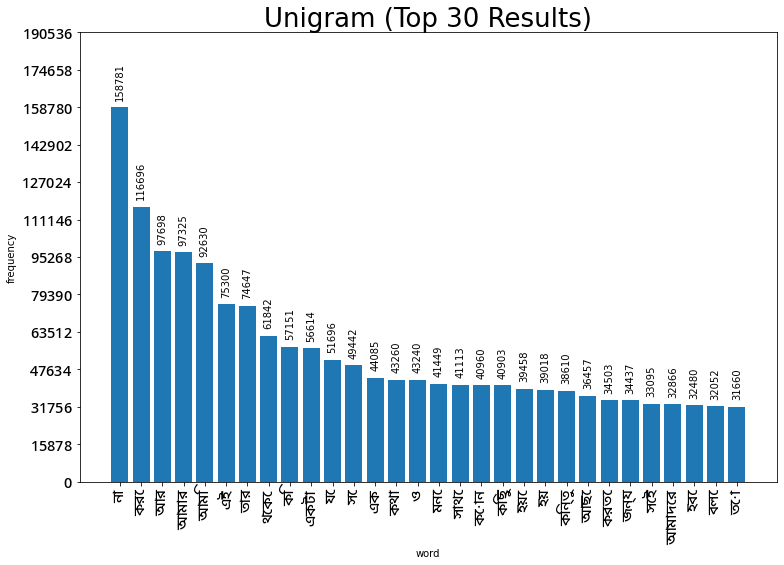

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
data = pd.read_csv('/content/unigram_frequency_wise_sort.csv', index_col=False)[:30].to_dict()
plot_histogram(data, 'Unigram (Top 30 Results)')

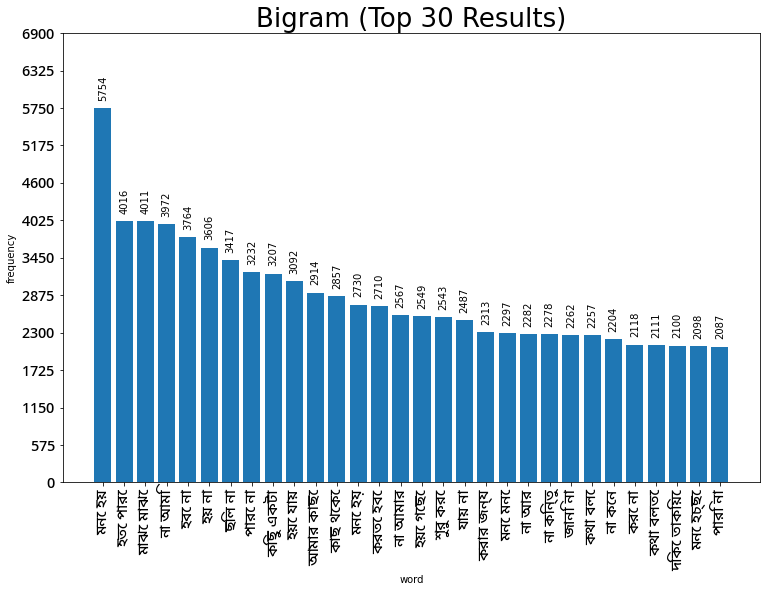

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
data = pd.read_csv('/content/bigram_frequency_wise_sort.csv', index_col=False)[:30].to_dict()
plot_histogram(data, 'Bigram (Top 30 Results)')

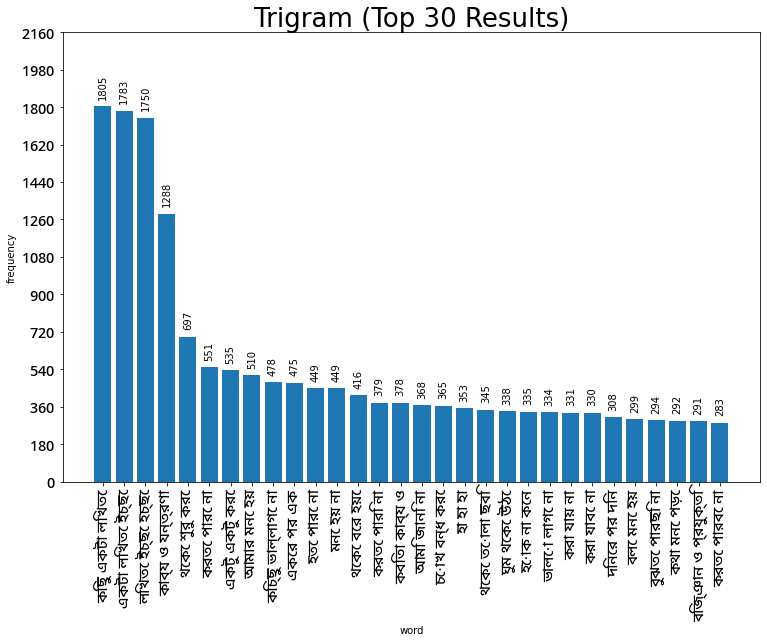

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
data = pd.read_csv('/content/trigram_frequency_wise_sort.csv', index_col=False)[:30].to_dict()
plot_histogram(data, 'Trigram (Top 30 Results)')

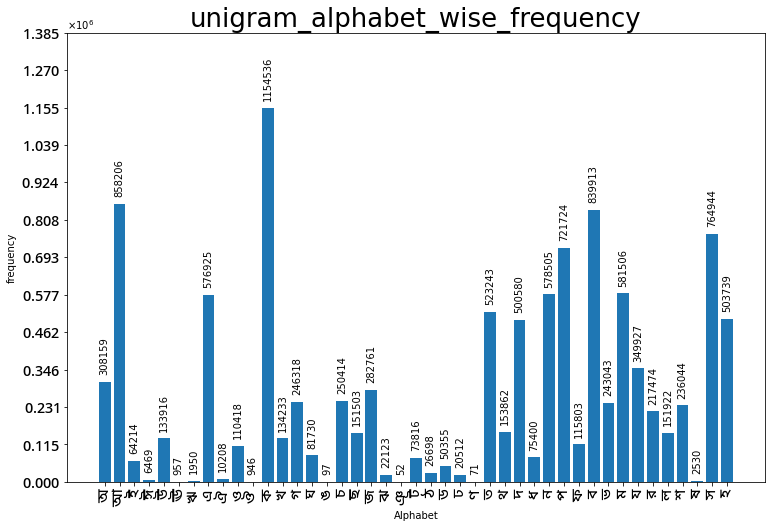

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
data = pd.read_csv('/content/unigram_alphabet_wise_frequency.csv', index_col=False).to_dict()
plot_histogram(data, 'unigram_alphabet_wise_frequency')

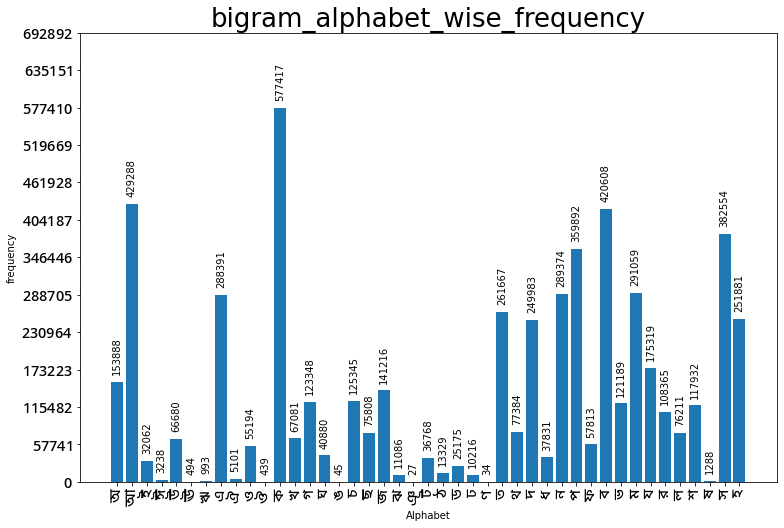

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
data = pd.read_csv('/content/bigram_alphabet_wise_frequency.csv', index_col=False).to_dict()
plot_histogram(data, 'bigram_alphabet_wise_frequency')

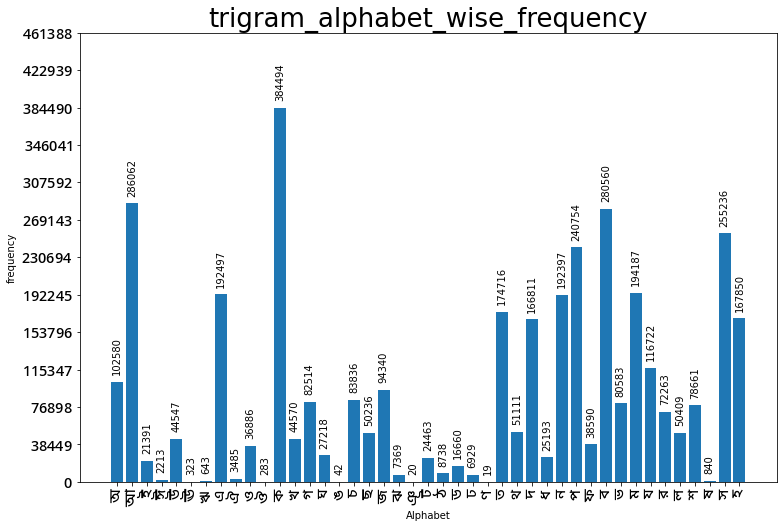

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
data = pd.read_csv('/content/trigram_alphabet_wise_frequency.csv', index_col=False).to_dict()
plot_histogram(data, 'trigram_alphabet_wise_frequency')

In [42]:
unique_unigram = pd.read_csv('/content/unique_unigram.csv')
unique_unigram

,word,frequency
0,আ,771
1,স্টার,219
2,ইজ,410
3,বর্ন,28
4,প্রতিরাতের,8
...,...,...
370044,চালিয়েছ,1
370045,গুপ্তজ্ঞানে,1
370046,গালিপালাজ,1
370047,গাড়ীটাকে,1


In [43]:
unique_bigram = pd.read_csv('/content/unique_bigram.csv')
unique_bigram

,word,frequency
0,আ স্টার,1
1,স্টার ইজ,1
2,ইজ বর্ন,1
3,বর্ন প্রতিরাতের,1
4,প্রতিরাতের মতন,1
...,...,...
5169397,অভাব সাফল্য,1
5169398,ব্যর্থতার দুইটার,1
5169399,দুইটার স্বাদ,1
5169400,স্বাদ এইরাতের,1


In [44]:
unique_trigram = pd.read_csv('/content/unique_trigram.csv')
unique_trigram

,word,frequency
0,আ স্টার ইজ,1
1,স্টার ইজ বর্ন,1
2,ইজ বর্ন প্রতিরাতের,1
3,বর্ন প্রতিরাতের মতন,1
4,প্রতিরাতের মতন আজও,1
...,...,...
9689895,স্বাদ এইরাতের মতো,1
9689896,এইরাতের মতো তিক্ত,1
9689897,মতো তিক্ত হয়ে,1
9689898,তিক্ত হয়ে যাওয়া,1
